# Crescendo Task MLB2016 Data (Data Scientist or MLE Role)

#### Farhan Sakif (farhan.sakif@gmail.com)

In [472]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [473]:
# Load in data

url = "https://raw.githubusercontent.com/sakifff/MLB2016-Data/main/MLB2016.json"
df = pd.read_json(url)

df.head()

,GameID,EventDateTimeUTC,AwayTeam,HomeTeam,DoubleHeaderGame,AwayStartingPitcher,HomeStartingPitcher,FinalScoreAway,FinalScoreHome,Lines
0,PIT201604030,1459703100,St. Louis Cardinals,Pittsburgh Pirates,0,A WAINWRIGHT,F LIRIANO,1,4,"{'EnteredDateTimeUTC': [1459433808.047, 145943..."
1,TBA201604030,1459713900,Toronto Blue Jays,Tampa Bay Rays,0,M STROMAN,C ARCHER,5,3,"{'EnteredDateTimeUTC': [1459433821.007, 145943..."
2,KCA201604030,1459730100,New York Mets,Kansas City Royals,0,M HARVEY,E VOLQUEZ,3,4,"{'EnteredDateTimeUTC': [1459433838.987, 145943..."
3,MIL201604040,1459793400,San Francisco Giants,Milwaukee Brewers,0,MBUMGARNER,W PERALTA,12,3,"{'EnteredDateTimeUTC': [1459618354.15, 1459618..."
4,BAL201604040,1459796700,Minnesota Twins,Baltimore Orioles,0,E SANTANA,C TILLMAN,2,3,"{'EnteredDateTimeUTC': [1459626288.963, 145962..."


# Q1. What was the final win percentage of the Chicago Cubs in 2016?

In [474]:
# Create two dataframes for home games and away games played by the Cubs
cubs_home = df.loc[df.HomeTeam == "Chicago Cubs"]
cubs_away = df.loc[df.AwayTeam == "Chicago Cubs"]

# Create a new column within the home and away dataframes that identifies if the Cubs won or not
cubs_home['win'] = cubs_home.FinalScoreHome > cubs_home.FinalScoreAway
cubs_away['win'] = cubs_away.FinalScoreHome < cubs_away.FinalScoreAway

# Append the dataframes together and sort by index to have it back in the original order
cubs = cubs_home.append(cubs_away)
cubs = cubs.sort_index()

In [475]:
# Now we have a dataframe of all of the Cubs' games in 2016 and also a new column indicating if they won or not
cubs.head()

,GameID,EventDateTimeUTC,AwayTeam,HomeTeam,DoubleHeaderGame,AwayStartingPitcher,HomeStartingPitcher,FinalScoreAway,FinalScoreHome,Lines,win
11,ANA201604040,1459821900,Chicago Cubs,Los Angeles Angels of Anaheim,0,J ARRIETA,G RICHARDS,9,0,"{'EnteredDateTimeUTC': [1459626333.66, 1459626...",True
22,ANA201604050,1459908300,Chicago Cubs,Los Angeles Angels of Anaheim,0,JLESTER,A HEANEY,6,1,"{'EnteredDateTimeUTC': [1459771935.223, 145977...",True
44,ARI201604070,1460079600,Chicago Cubs,Arizona Diamondbacks,0,J LACKEY,R DE LA ROSA,14,6,"{'EnteredDateTimeUTC': [1459944990.827, 145994...",True
56,ARI201604080,1460166000,Chicago Cubs,Arizona Diamondbacks,0,J HAMMEL,R RAY,2,3,"{'EnteredDateTimeUTC': [1460031193.667, 146003...",False
69,ARI201604090,1460247000,Chicago Cubs,Arizona Diamondbacks,0,K HENDRICKS,Z GREINKE,4,2,"{'EnteredDateTimeUTC': [1460116762.613, 146011...",True


In [476]:
# Count the number of times True appears and divide by the length of the Cubs dataframe

print("The Chicago Cubs' final win percentage in 2016 is: " + str(cubs.win.value_counts()[True] / len(cubs) * 100) + "%")

The Chicago Cubs' final win percentage in 2016 is: 63.687150837988824%


# Q1. a) Plot the winning percentage of the Chicago Cubs as a function of time in 2016.

In [477]:
sorted(list(cubs.EventDateTimeUTC)) == list(cubs.EventDateTimeUTC)

# Since the output is True, I can assume that the dataframe is in the order of the games played throughout the year

True

In [478]:
# Create empty list to append the win percentage throughout the year and make a copy of the cubs dataframe
win_percentage = []
cubs2 = cubs.copy()

# The idea here is to calculate win percentage at the end of the dataframe (like the previous question) and remove the last row
# Doing so in a while loop will keep removing the last row of the dataframe and calculate the win percentage at that point
# All while appending to the empty list created above
# So for example the last iteration of the loop will be the win % for the first game played of the year (since only the first row is left)
# Since the Cubs won that game, the win % will be 100
while len(cubs2) > 0:
    x = cubs2.win.value_counts()[True] / len(cubs2) * 100
    win_percentage.append(x)
    cubs2 = cubs2[:-1]

# The result is a list containing the win percentage of the Cubs throughout the year but reversed since we calculated backwards
# So reverse the list
win_percentage.reverse()

# And add in a new column to the dataframe
cubs['win_percentage'] = win_percentage

In [479]:
cubs.win_percentage

11      100.000000
22      100.000000
44      100.000000
56       75.000000
69       80.000000
           ...    
2457     63.428571
2458     63.068182
2459     63.276836
2460     63.483146
2461     63.687151
Name: win_percentage, Length: 179, dtype: float64

In [480]:
cubs = cubs.reset_index()

Text(0.5, 0, 'Games played')

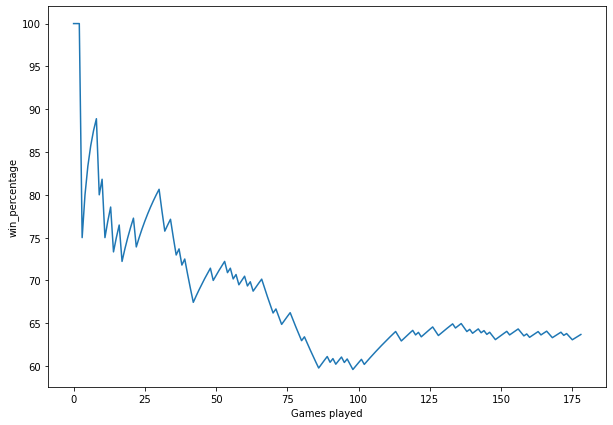

In [481]:
# Now finally plot in the win percentage

plt.figure(figsize=(10, 7))
sns.lineplot(data=cubs, x=cubs.index, y='win_percentage')
plt.xlabel('Games played')

# Q2. Create an object that counts the number of games each pitcher started and the number of wins

### Data Cleaning

- I noticed some pitchers appear in the dataframe with a different spelling for their names and as a result any code that I write will consider those to be two different players. For example, "Z NEAL" shows up as "ZNEAL" or "B SNELL" showing up as "BSNELL"

- So I identified all the players that have this inconsistency issue and will apply a quick fix to it before doing the rest of the question

- Fixing this will make the data better prepared for answering the next question

In [482]:
names = ['JNIESE', 'ZNEAL', 'WPEREZ', 'DSTRAILY', 'BSNELL', 'JTOMLIN', 'JTAILLON', 'SGRAY', 'DFISTER', 'JNICASIO', 'JLAMB',
         'MTANAKA', 'TANDERSON', 'RSTEPHENSON', 'CBASSITT', 'CRICHARD', 'DMENGDEN', 'RDICKEY', 'KSAMPSON', 'ERODRIGUEZ', 
         'JARRIETA']

for i in names:
    df['HomeStartingPitcher'] = df['HomeStartingPitcher'].replace(to_replace=i, value=(i[:1] + ' ' + i[1:]))
    df['AwayStartingPitcher'] = df['AwayStartingPitcher'].replace(to_replace=i, value=(i[:1] + ' ' + i[1:]))

In [483]:
# Create new dataframe of the pitchers

pitching = pd.DataFrame(data=set(list(df.HomeStartingPitcher)), columns=['pitcher'])

In [484]:
pitching.head()

,pitcher
0,S STRASBURG
1,D WRIGHT
2,T WALKER
3,I KENNEDY
4,D GEE


In [485]:
home_games_started = []
away_games_started = []
home_games_won = []
away_games_won = []

# Loop through the different pitchers and count how many appearances they made (the amount of times they appear should be it)
# Then loop through the times they have appeared and won the game (for both home and away)
# Add all the counts to the empty lists created above
for i in (list(pitching.pitcher)):
    x = len(df.loc[df.HomeStartingPitcher == i])
    home_games_started.append(x)
    
    y = len(df.loc[df.AwayStartingPitcher == i])
    away_games_started.append(y)
    
    a = len(df[(df.HomeStartingPitcher == i) & (df.FinalScoreHome > df.FinalScoreAway)])
    home_games_won.append(a)
    
    b = len(df[(df.AwayStartingPitcher == i) & (df.FinalScoreHome < df.FinalScoreAway)])
    away_games_won.append(b)
    
# Add the newly formed lists as columns to the pitching dataframe    
pitching['home_games_started'] = home_games_played
pitching['away_games_started'] = away_games_played
pitching['home_games_won'] = home_games_won
pitching['away_games_won'] = away_games_won

# Aggregate home and away stats to get totals
pitching['games_started'] = pitching.home_games_started + pitching.away_games_started
pitching['games_won'] = pitching.home_games_won + pitching.away_games_won

pitching_info = pitching.drop(columns=['home_games_started', 'away_games_started', 'home_games_won', 'away_games_won'])

In [486]:
pitching_info = pitching_info.sort_values('pitcher')
pitching_info.head(6)

,pitcher,games_started,games_won
234,A ALBERS,2,0
5,A ASHER,5,2
99,A BLAIR,15,4
111,A BRADLEY,26,13
224,A CASHNER,27,11
122,A COBB,5,2


# Q2. a) How would you rank the pitchers from best to worst using the information from the table above?

In [487]:
pitching_info.games_started.describe()

count    298.000000
mean      16.335570
std       11.649546
min        1.000000
25%        5.000000
50%       14.000000
75%       26.000000
max       58.000000
Name: games_started, dtype: float64

- For a more holistic picture of the data, lets only consider the pitchers that have started around the average number of games or more

In [488]:
pitching_info = pitching_info.loc[pitching_info.games_started > 15]

In [489]:
pitching_info['win_ratio'] = pitching_info.games_won / pitching_info.games_started

In [490]:
sort = pitching_info.sort_values('win_ratio', ascending=False)
sort

,pitcher,games_started,games_won,win_ratio
164,C KERSHAW,25,20,0.800000
0,S STRASBURG,24,19,0.791667
48,J LESTER,36,27,0.750000
161,M TANAKA,31,23,0.741935
273,R PORCELLO,34,25,0.735294
...,...,...,...,...
43,C ARCHER,33,10,0.303030
32,P CORBIN,24,7,0.291667
297,J SHIELDS,33,9,0.272727
250,E SANTANA,30,8,0.266667


- Ranking pitchers based on games started and games won should only be a starting point as there are many more factors that would go into pitching performance, more specifically individual performance based metrics rather than team performance metrics such as games won as at the end of the day the team's overall performance wins the game.

- However using only the information above, a conclusion as to who the best pitchers are can be made when looking at the win/loss ratio and provided the pitchers have started a decent number of games

# Q3. For each game extract the first and last MoneyUS2 recorded that aren’t NA’s, use odds.converter to transform it into probabilities and finally create a binary column indicating if Home Team won or not.

In [491]:
# The 'Lines' column is a series of dictionaries so we can turn it into a dataframe by turning each dictionary into a series

df2 = df.drop('Lines', axis=1).join(pd.DataFrame(df.Lines.values.tolist()))

In [492]:
#Extract the first and last values of First_MoneyUS2 and Last_MoneyUS2

First_MoneyUS2 = []
Last_MoneyUS2 = []

for i in df2.MoneyUS2:
    First_MoneyUS2.append(i[0])
    Last_MoneyUS2.append(i[-1])
    
df2['First_MoneyUS2'] = First_MoneyUS2
df2['Last_MoneyUS2'] = Last_MoneyUS2

In [493]:
#Add a column indicating a binary whether the home team won or not

df2['WinHomeTeam'] = df2.FinalScoreHome > df2.FinalScoreAway

In [494]:
# Filter out the columns we don't want

probabilities = df2[['GameID', 'First_MoneyUS2', 'Last_MoneyUS2', 'WinHomeTeam']]
probabilities.head()

,GameID,First_MoneyUS2,Last_MoneyUS2,WinHomeTeam
0,PIT201604030,102,-118,True
1,TBA201604030,104,-117,False
2,KCA201604030,106,107,True
3,MIL201604040,165,155,False
4,BAL201604040,-119,-114,True


In [495]:
# Replace NA values with np.nan for easy removal

probabilities['First_MoneyUS2'] = probabilities['First_MoneyUS2'].replace(to_replace='NA', value=np.nan)
probabilities['Last_MoneyUS2'] = probabilities['Last_MoneyUS2'].replace(to_replace='NA', value=np.nan)

# Drop the NaN values

probabilities = probabilities.dropna()

- I could not find a similar python package to R's CRAN odds.converter so I will create a function myself to convert the American Odds to the implied probability using the formula shown in this website: https://www.thelines.com/calculate-implied-probability-american-betting-odds/

In [496]:
def convert_negative_odds(odds):
    '''
    - Function that converts negative American odds (favorites) into implied probability
    '''
    return odds / (odds + 100) * 100

def convert_positive_odds(odds):
    '''
    - Function that converts positive American odds (underdogs) into implied probability
    '''
    return 100 / (odds + 100) * 100

In [497]:
# Use the function within a loop to convert all the values to implied probability

first_prob = []
last_prob = []

for i in probabilities.First_MoneyUS2:
    if i > 0:
        first_prob.append(convert_positive_odds(abs(i)))
    else:
        first_prob.append(convert_negative_odds(abs(i)))
        
for i in probabilities.Last_MoneyUS2:
    if i > 0:
        last_prob.append(convert_positive_odds(abs(i)))
    else:
        last_prob.append(convert_negative_odds(abs(i)))

In [498]:
probabilities.First_MoneyUS2 = first_prob
probabilities.Last_MoneyUS2 = last_prob

# replace True and False with 1 and 0 (to replicate given example and is also needed for the next section)
probabilities['WinHomeTeam'] = probabilities['WinHomeTeam'].replace(to_replace=True, value=1)
probabilities['WinHomeTeam'] = probabilities['WinHomeTeam'].replace(to_replace=False, value=0)

probabilities.head(6)

,GameID,First_MoneyUS2,Last_MoneyUS2,WinHomeTeam
0,PIT201604030,49.504950,54.128440,1.0
1,TBA201604030,49.019608,53.917051,0.0
2,KCA201604030,48.543689,48.309179,1.0
3,MIL201604040,37.735849,39.215686,0.0
4,BAL201604040,54.337900,53.271028,1.0
5,TEX201604040,53.051643,54.545455,1.0


# Q3. a) The table above presents 2 different set probabilities of home team winning (First_MoneyUS2 and Last_MoneyUS2). Which column is a better predictor of the final outcome? Please give a brief explanation.

- Converting the probabilities to 0 or 1 creates a problematic situation where 0.51 and 0.49 are considered to be very different but 0.51 and 0.91 are considered to be the same. To measure the difference between claimed event probability values and the event occurrences, we can look at the Brier score. The Brier score measures the mean squared difference between the predicted probability and the actual outcome

- The Brier score is appropriate for binary and categorical outcomes that can be structured as true or false, but is inappropriate for ordinal variables which can take on three or more values. So it is perfect for this situation as we are looking at a binary outcome of a win or a loss.

- Another way to evaluate the difference between claimed event probability and the event occurrences is to look at the log loss. I will look at both the Brier score and log loss for consistency

In [499]:
probabilities.head()

,GameID,First_MoneyUS2,Last_MoneyUS2,WinHomeTeam
0,PIT201604030,49.504950,54.128440,1.0
1,TBA201604030,49.019608,53.917051,0.0
2,KCA201604030,48.543689,48.309179,1.0
3,MIL201604040,37.735849,39.215686,0.0
4,BAL201604040,54.337900,53.271028,1.0


In [500]:
from sklearn.metrics import brier_score_loss

# Brier score for First_MoneyUS2
y = probabilities.WinHomeTeam
y_pred = probabilities.First_MoneyUS2 / 100 #convert to decimal

loss = brier_score_loss(y, y_pred)
print("Brier score for First_MoneyUS2: " + str(loss))

#Brier score for Last_MoneyUS2
y = probabilities.WinHomeTeam
y_pred2 = probabilities.Last_MoneyUS2 / 100

loss2 = brier_score_loss(y, y_pred2)
print("Brier score for Last_MoneyUS2: " + str(loss2))

Brier score for First_MoneyUS2: 0.24223322113446868
Brier score for Last_MoneyUS2: 0.24064301181370085


In [501]:
from sklearn.metrics import log_loss

# Log loss for First_MoneyUS2
y = probabilities.WinHomeTeam
y_pred = probabilities.First_MoneyUS2 / 100 #convert to decimal

loss = log_loss(y, y_pred)
print("Log loss for First_MoneyUS2: " + str(loss))

# Log loss for Last_MoneyUS2
y = probabilities.WinHomeTeam
y_pred2 = probabilities.Last_MoneyUS2 / 100

loss2 = log_loss(y, y_pred2)
print("Log loss for Last_MoneyUS2: " + str(loss2))

Log loss for First_MoneyUS2: 0.6775509408143948
Log loss for Last_MoneyUS2: 0.6742014257932837


- For both the Brier score and log loss, the lower the value the better. So with that in mind, it can be seen that the Last_MoneyUS2 column has a very slightly lower value for both the Brier score and log loss **so it can be concluded that the Last_MoneyUS2 column is a slightly better predictor of the final outcome**